In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample

In [2]:
data = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\ML\Datasets\diabetes.csv')

In [3]:
df1 = data.copy()

In [186]:
df1.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
416,1,97,68,21,0,27.2,1.095,22,0
560,6,125,76,0,0,33.8,0.121,54,1
134,2,96,68,13,49,21.1,0.647,26,0
447,0,95,80,45,92,36.5,0.330,26,0
258,1,193,50,16,375,25.9,0.655,24,0


In [5]:
df1['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
majority = df1[df1['Outcome']==0]

In [7]:
minority = df1[df1['Outcome']==1]

In [8]:
upsample = resample(minority,replace=True, n_samples=len(majority),random_state=63)

In [9]:
df = pd.concat([majority,upsample])

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    500
Name: count, dtype: int64

In [12]:
df['Insulin'].corr(df['Outcome'])

0.10162579923469615

In [13]:
df.shape

(1000, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 264
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 78.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,4.081000,125.733000,68.989000,20.319000,80.973000,32.804400,0.482927,34.14600,0.50000
std,3.408233,33.681986,20.874641,16.356307,119.921272,8.014965,0.333095,11.71221,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.00000,0.00000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.900000,0.250500,25.00000,0.00000
50%,3.000000,122.000000,72.000000,23.000000,0.000000,32.800000,0.383000,30.00000,0.50000
75%,7.000000,148.000000,80.000000,33.000000,130.000000,37.525000,0.645250,41.00000,1.00000
max,15.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.00000,1.00000


<Axes: >

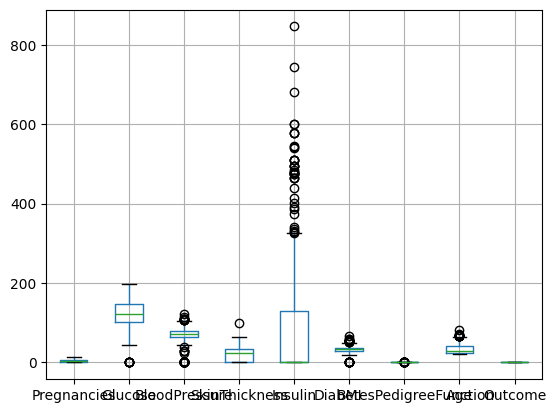

In [16]:
df.boxplot()

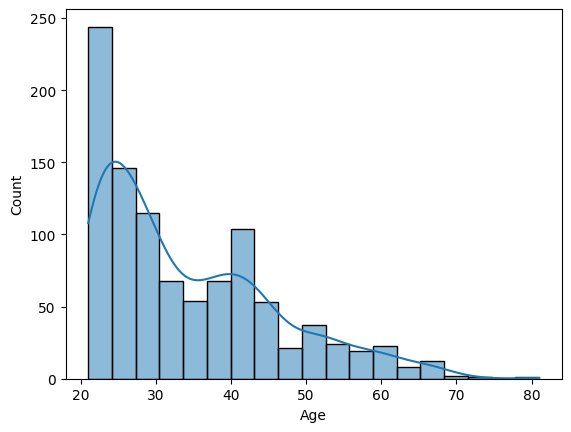

In [17]:
sns.histplot(df['Age'],kde=True)
plt.show()

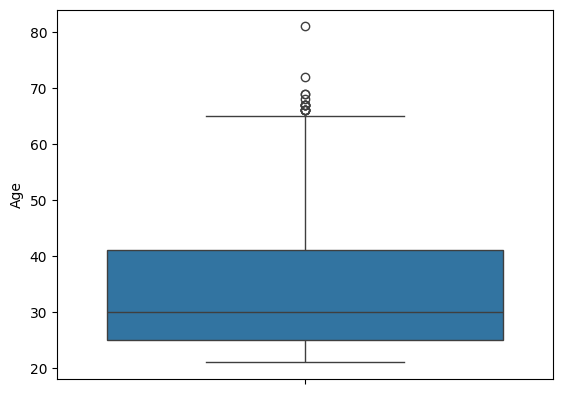

In [18]:
sns.boxplot(df['Age'])
plt.show()

In [19]:
df['Age'][df['Age'] > df['Age'].quantile(0.98)]

123    69
148    65
294    65
362    65
453    72
459    81
489    67
495    66
509    64
537    67
552    66
674    68
684    69
363    67
221    66
759    66
221    66
221    66
363    67
363    67
Name: Age, dtype: int64

In [20]:
dummy = df['Age']

In [21]:
ls = list(map(lambda x: dummy.mean() if x>66 else x , dummy))

In [22]:
max(ls)

66

In [23]:
df['Age'] = ls

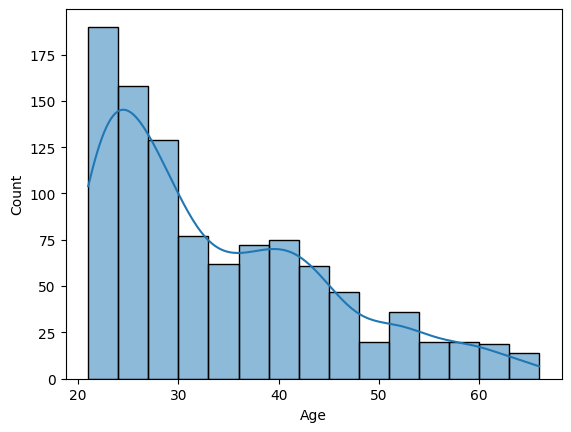

In [24]:
sns.histplot(df['Age'],kde=True)
plt.show()


In [25]:
j= np.log(df['Age'])

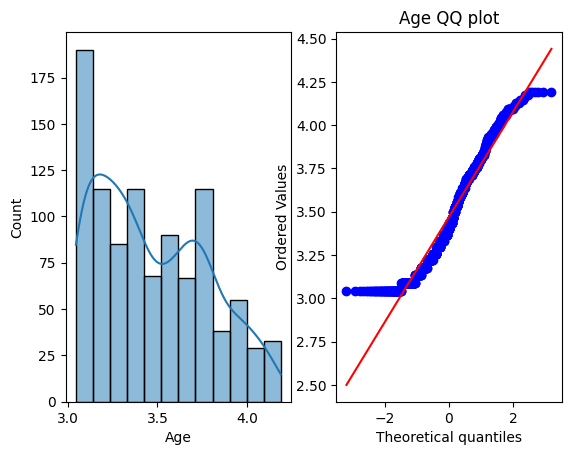

In [26]:
plt.subplot(1,2,1)
sns.histplot(j,kde=True)

plt.subplot(1,2,2)
stat.probplot(j, dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()


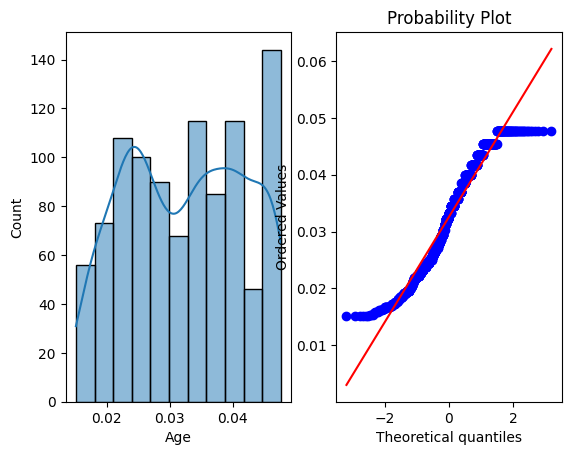

In [27]:
#RECIPROCAL

plt.subplot(1,2,1)
sns.histplot(1/df['Age'],kde=True)

plt.subplot(1,2,2)
stat.probplot(1/df['Age'],dist='norm',plot=plt)
plt.show()

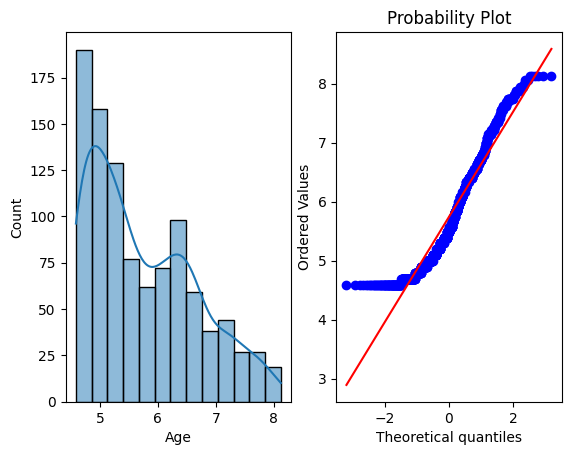

In [28]:
#SQUARE ROOT

plt.subplot(1,2,1)
sns.histplot(df['Age']**(1/2), kde=True)
plt.subplot(1,2,2)
stat.probplot(df['Age']**(1/2),dist='norm',plot=plt)
plt.show()

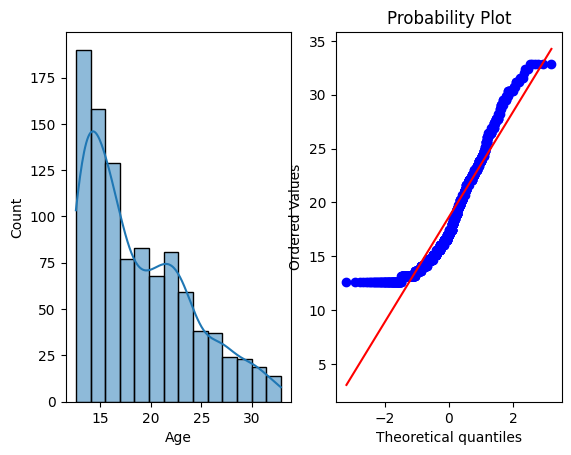

In [29]:
#EXPONENTIAL

plt.subplot(1,2,1)
sns.histplot(df['Age']**(1/1.2), kde=True)
plt.subplot(1,2,2)
stat.probplot(df['Age']**(1/1.2),dist='norm',plot=plt)
plt.show()

In [30]:
df['Age_boxcox'],parameters=stat.boxcox(df['Age'])

In [31]:
print(parameters)

-0.8006219057066445


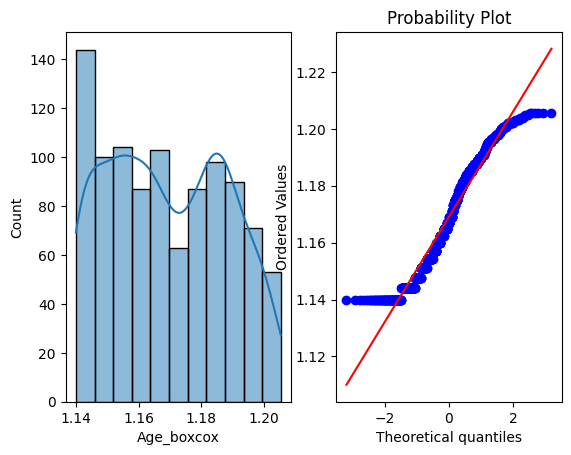

In [32]:
plt.subplot(1,2,1)
sns.histplot(df['Age_boxcox'], kde=True)
plt.subplot(1,2,2)
stat.probplot(df['Age_boxcox'],dist='norm',plot=plt)
plt.show()

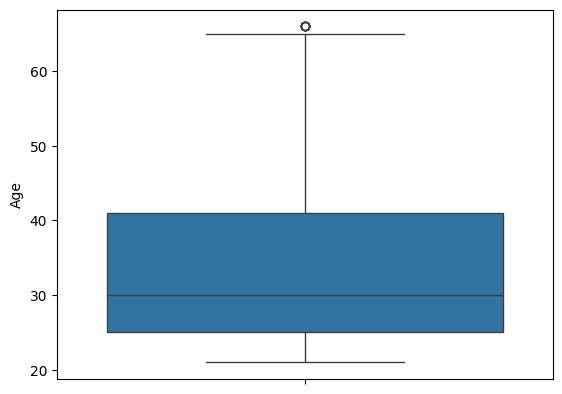

In [33]:
sns.boxplot(df['Age'])
plt.show()

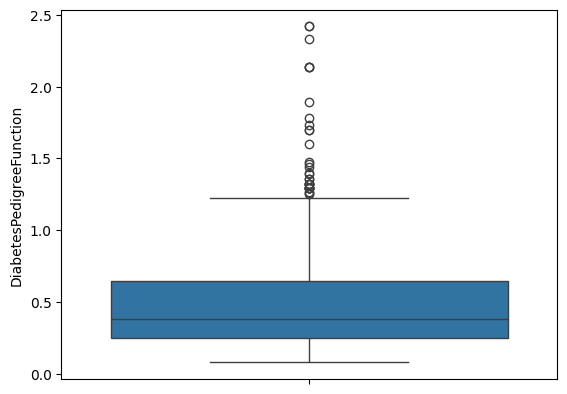

In [34]:
sns.boxplot(df['DiabetesPedigreeFunction'])

plt.show()

In [35]:
df['DiabetesPedigreeFunction'][df['DiabetesPedigreeFunction']>df['DiabetesPedigreeFunction'].quantile(0.97)]

12     1.441
58     1.781
147    1.400
228    2.329
330    1.476
371    1.731
395    1.600
593    1.699
621    1.698
622    1.461
659    1.292
659    1.292
659    1.292
259    1.353
445    2.420
187    1.321
187    1.321
659    1.292
259    1.353
370    2.137
659    1.292
45     1.893
39     1.390
370    2.137
187    1.321
659    1.292
243    1.318
370    2.137
243    1.318
445    2.420
Name: DiabetesPedigreeFunction, dtype: float64

In [36]:
mean = np.mean(df['DiabetesPedigreeFunction'])

In [37]:
df['DiabetesPedigreeFunction'] = np.where((df['DiabetesPedigreeFunction'] > 1.268 ) ,mean , df['DiabetesPedigreeFunction'])

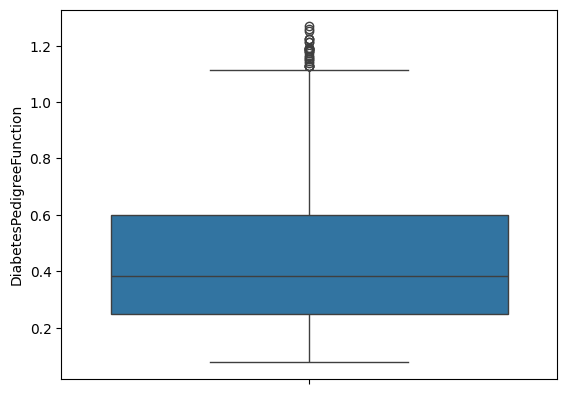

In [38]:
sns.boxplot(df['DiabetesPedigreeFunction'])

plt.show()

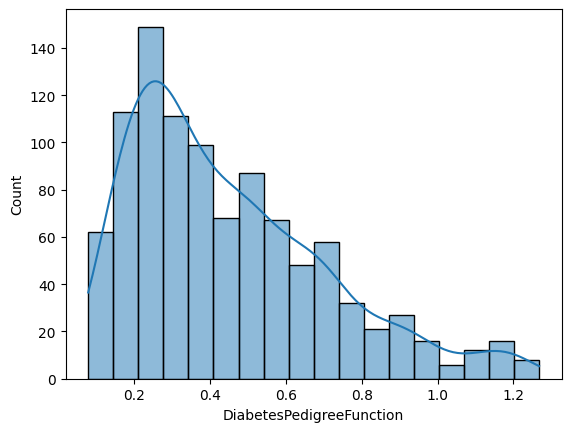

In [39]:
sns.histplot(df['DiabetesPedigreeFunction'],kde=True)
plt.show()

In [40]:
l=np.log(df['DiabetesPedigreeFunction'])


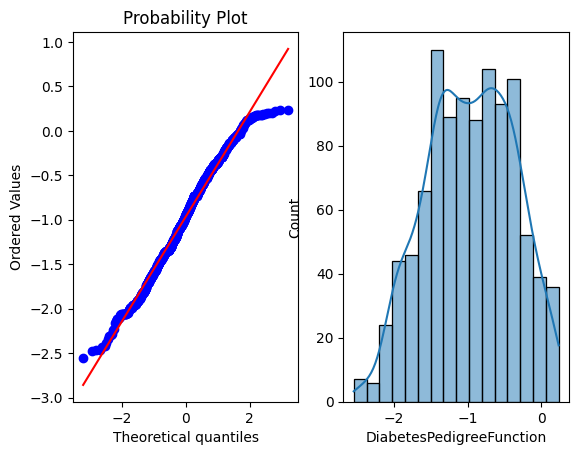

In [41]:
plt.subplot(1,2,1)
stat.probplot(l,dist='norm',plot=plt)

plt.subplot(1,2,2)
sns.histplot(l,kde=True)
plt.show()

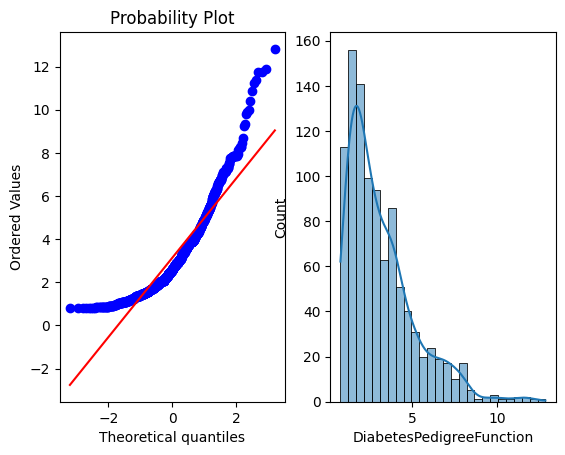

In [42]:
plt.subplot(1,2,1)
stat.probplot(1/df['DiabetesPedigreeFunction'],dist='norm',plot=plt)

plt.subplot(1,2,2)
sns.histplot(1/df['DiabetesPedigreeFunction'],kde=True)
plt.show()

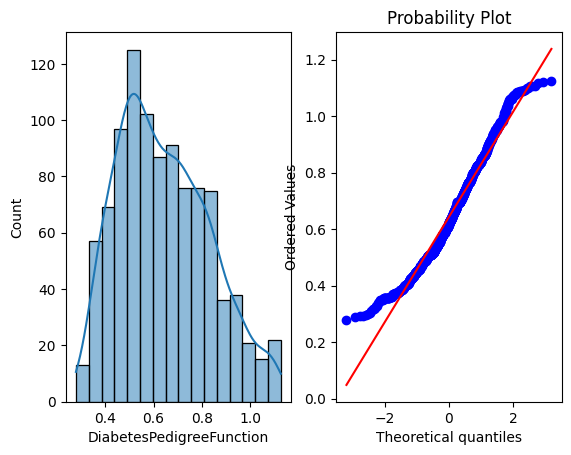

In [43]:
plt.subplot(1,2,1)
sns.histplot(df['DiabetesPedigreeFunction']**(1/2), kde=True)
plt.subplot(1,2,2)
stat.probplot(df['DiabetesPedigreeFunction']**(1/2),dist='norm',plot=plt)
plt.show()

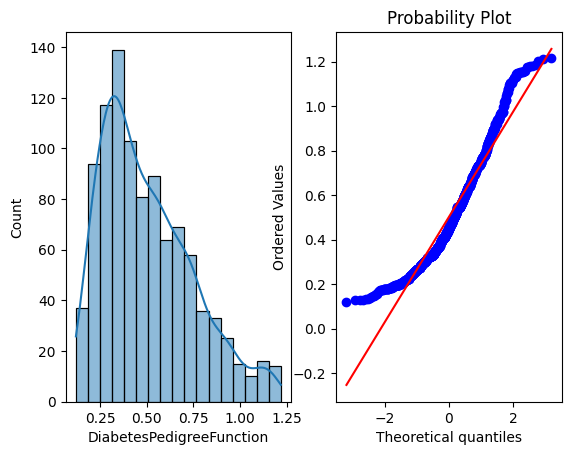

In [44]:
#EXPONENTIAL

plt.subplot(1,2,1)
sns.histplot(df['DiabetesPedigreeFunction']**(1/1.2), kde=True)
plt.subplot(1,2,2)
stat.probplot(df['DiabetesPedigreeFunction']**(1/1.2),dist='norm',plot=plt)
plt.show()

In [45]:
df['dpf_boxcox'],parameters=stat.boxcox(df['DiabetesPedigreeFunction'])

In [46]:
parameters

0.09537004180225304

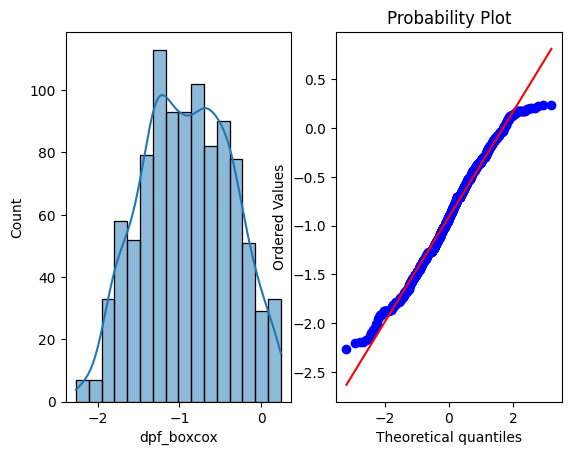

In [47]:
plt.subplot(1,2,1)
sns.histplot(df['dpf_boxcox'], kde=True)
plt.subplot(1,2,2)
stat.probplot(df['dpf_boxcox'],dist='norm',plot=plt)
plt.show()

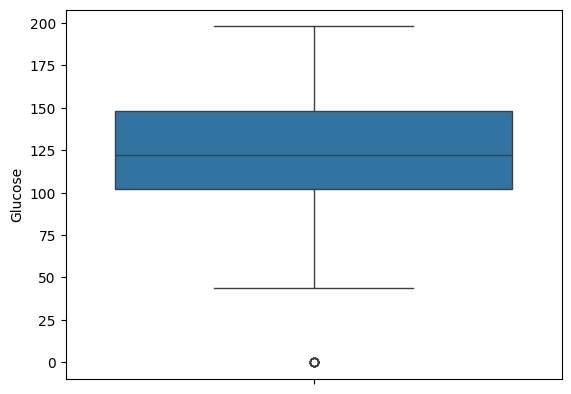

In [48]:
sns.boxplot(df['Glucose'])

plt.show()

In [49]:
df['Glucose'][df['Glucose'] < df['Glucose'].quantile(0.01)]

62     44
75      0
182     0
342     0
680    56
349     0
349     0
349     0
349     0
502     0
Name: Glucose, dtype: int64

In [50]:
df = df[df['Glucose']!=0]

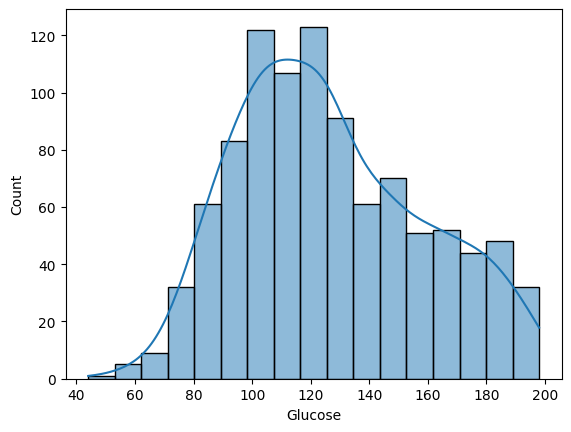

In [51]:
sns.histplot(df['Glucose'],kde=True)
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 1 to 264
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               992 non-null    int64  
 1   Glucose                   992 non-null    int64  
 2   BloodPressure             992 non-null    int64  
 3   SkinThickness             992 non-null    int64  
 4   Insulin                   992 non-null    int64  
 5   BMI                       992 non-null    float64
 6   DiabetesPedigreeFunction  992 non-null    float64
 7   Age                       992 non-null    float64
 8   Outcome                   992 non-null    int64  
 9   Age_boxcox                992 non-null    float64
 10  dpf_boxcox                992 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 93.0 KB


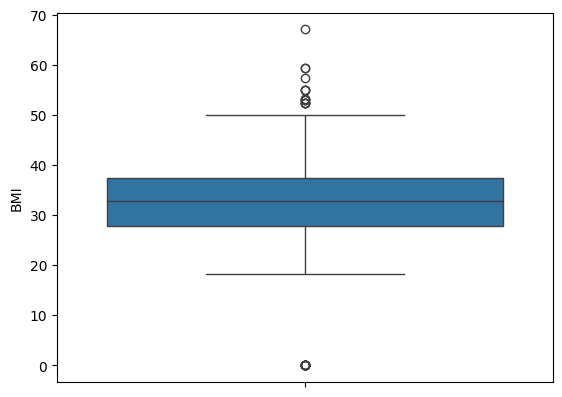

In [53]:
sns.boxplot(df['BMI'])
plt.show()

In [54]:
df['BMI'][df['BMI']<df['BMI'].quantile(0.05)]

33     19.9
49      0.0
50     19.4
60      0.0
68     19.6
81      0.0
90     19.1
97     20.4
134    21.1
140    21.1
145     0.0
151    21.9
203    20.4
239    18.4
288    20.8
294    21.9
304    21.0
316    19.3
348    21.8
367    21.0
371     0.0
381    20.0
398    21.1
407    21.9
418    18.2
426     0.0
438    18.2
450    21.2
453    19.6
460    20.8
461    21.8
465    21.8
494     0.0
519    19.6
522     0.0
525    21.8
526    18.2
537    21.7
589    21.1
607    19.5
617    20.1
639    19.5
656    21.8
684     0.0
706     0.0
706     0.0
9       0.0
9       0.0
706     0.0
Name: BMI, dtype: float64

In [55]:
df = df[df['BMI']!= 0]

In [56]:
df['BMI'][df['BMI']>df['BMI'].quantile(0.98)]

247    52.3
673    57.3
120    53.2
303    52.9
193    52.3
125    55.0
155    50.0
193    52.3
445    59.4
120    53.2
99     49.7
155    50.0
303    52.9
193    52.3
125    55.0
99     49.7
177    67.1
445    59.4
99     49.7
125    55.0
Name: BMI, dtype: float64

In [57]:
dummy = df['BMI']

In [58]:
ls = list(map(lambda x : int(dummy.mean()) if x>49.3 else x,dummy))


In [59]:
df['BMI'] = ls

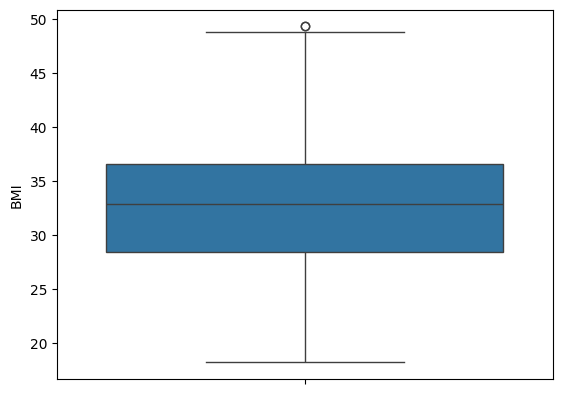

In [60]:
sns.boxplot(df['BMI'])
plt.show()

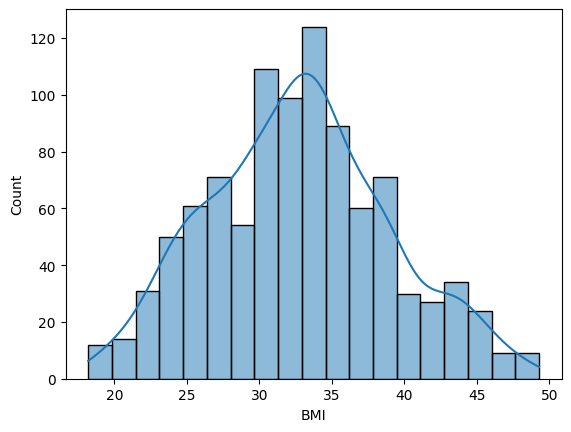

In [61]:
sns.histplot(df['BMI'],kde=True)
plt.show()

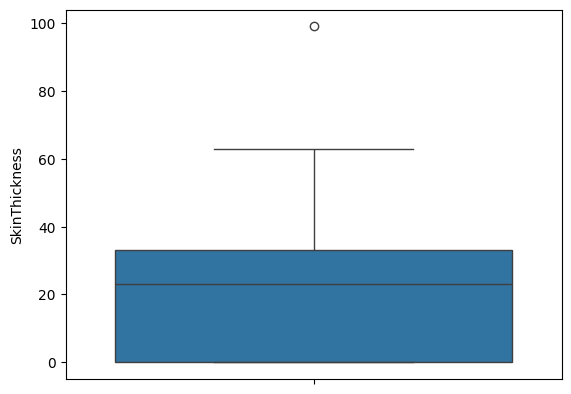

In [62]:
sns.boxplot(df['SkinThickness'])
plt.show()

In [63]:
df['SkinThickness'].value_counts()

SkinThickness
0     308
32     38
31     30
30     30
33     29
27     28
36     27
29     26
37     24
40     24
28     24
41     23
19     23
23     23
18     19
24     18
26     18
25     18
35     17
22     17
17     16
39     16
15     15
42     15
21     12
13     12
46     11
20     10
12     10
44      9
14      8
34      8
38      7
48      7
16      6
11      6
49      6
45      5
47      5
10      5
43      4
50      3
51      3
7       3
63      2
56      2
54      2
8       2
52      2
60      1
99      1
Name: count, dtype: int64

In [64]:
df['SkinThickness'][df['SkinThickness']>df['SkinThickness'].quantile(0.99)]

57     60
86     54
211    54
275    52
532    52
120    56
445    63
120    56
579    99
445    63
Name: SkinThickness, dtype: int64

In [65]:
df = df[df['SkinThickness']!=99]

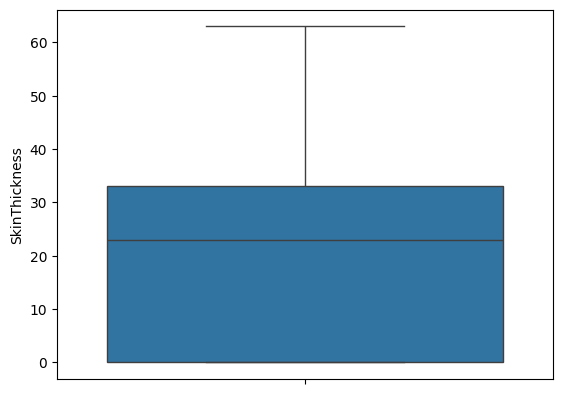

In [66]:
sns.boxplot(df['SkinThickness'])
plt.show()

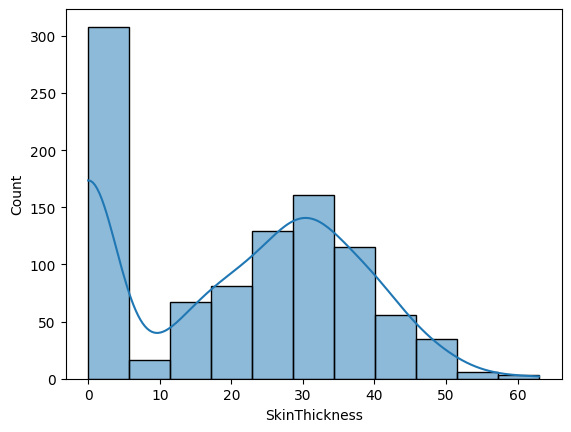

In [67]:
sns.histplot(df['SkinThickness'],kde=True)
plt.show()

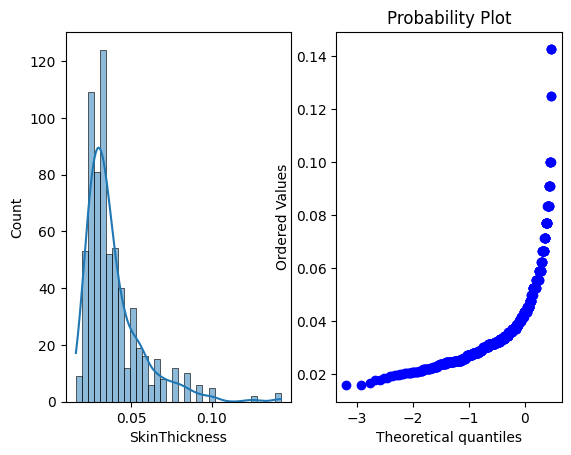

In [68]:
plt.subplot(1,2,1)
sns.histplot(1/df['SkinThickness'],kde=True)

plt.subplot(1,2,2)
stat.probplot(1/df['SkinThickness'],dist='norm',plot = plt)
plt.show()

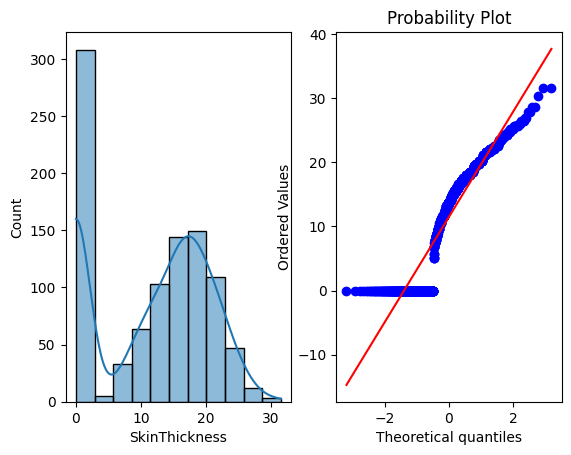

In [69]:
plt.subplot(1,2,1)
sns.histplot(df['SkinThickness']**(1/1.2),kde=True)

plt.subplot(1,2,2)
stat.probplot(df['SkinThickness']**(1/1.2),dist='norm',plot = plt)
plt.show()

In [70]:
k = np.log1p(df['SkinThickness'])

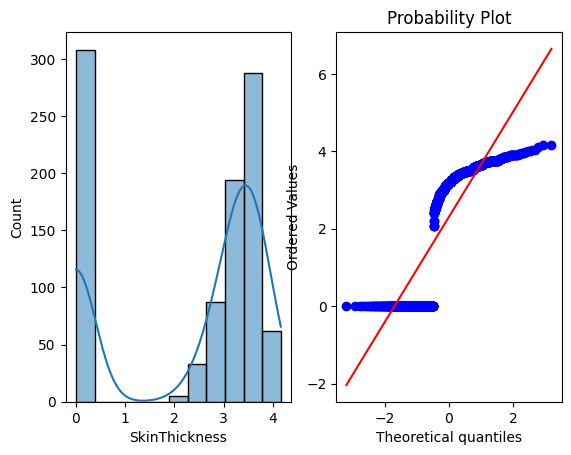

In [71]:
plt.subplot(1,2,1)
sns.histplot(k,kde=True)

plt.subplot(1,2,2)
stat.probplot(k,dist='norm',plot = plt)
plt.show()

In [72]:
df['SkinThickness'].corr(df['Outcome'])

0.030897765362924122

In [73]:
df.drop('Age',axis=1,inplace=True)
df.drop('DiabetesPedigreeFunction',axis=1,inplace=True)


In [74]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome,Age_boxcox,dpf_boxcox
384,1,125,70,24,110,24.3,0,1.154110,-1.405957
688,1,140,74,26,180,24.1,0,1.147558,-0.187054
570,3,78,70,0,0,32.5,0,1.182543,-1.230883


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 1 to 264
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    977 non-null    int64  
 1   Glucose        977 non-null    int64  
 2   BloodPressure  977 non-null    int64  
 3   SkinThickness  977 non-null    int64  
 4   Insulin        977 non-null    int64  
 5   BMI            977 non-null    float64
 6   Outcome        977 non-null    int64  
 7   Age_boxcox     977 non-null    float64
 8   dpf_boxcox     977 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 76.3 KB


In [76]:
df['Pregnancies'].unique()

array([ 1,  5, 10,  4,  3,  8, 13,  6, 11,  7,  2,  0,  9, 12, 14, 15],
      dtype=int64)

In [77]:
df['Pregnancies'].value_counts()

Pregnancies
1     153
0     134
2     119
3     102
4      93
7      76
5      73
6      55
8      52
9      41
10     29
11     17
13     14
12     14
14      4
15      1
Name: count, dtype: int64

In [78]:
df = df[~df['Pregnancies'].isin([14,15,17])]

In [79]:
df['Pregnancies'].value_counts()

Pregnancies
1     153
0     134
2     119
3     102
4      93
7      76
5      73
6      55
8      52
9      41
10     29
11     17
13     14
12     14
Name: count, dtype: int64

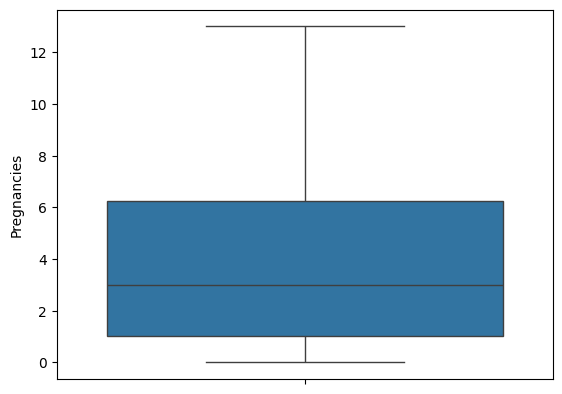

In [80]:
sns.boxplot(df['Pregnancies'])
plt.show()

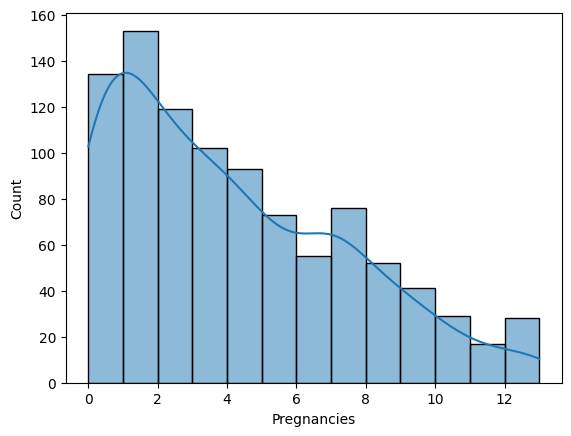

In [81]:
sns.histplot(df['Pregnancies'],kde = True)
plt.show()

In [82]:
p1 = np.log(df['Pregnancies'])
p1

1      0.000000
3      0.000000
5      1.609438
7      2.302585
10     1.386294
         ...   
11     2.302585
399    1.098612
388    1.609438
408    2.079442
264    1.386294
Name: Pregnancies, Length: 972, dtype: float64

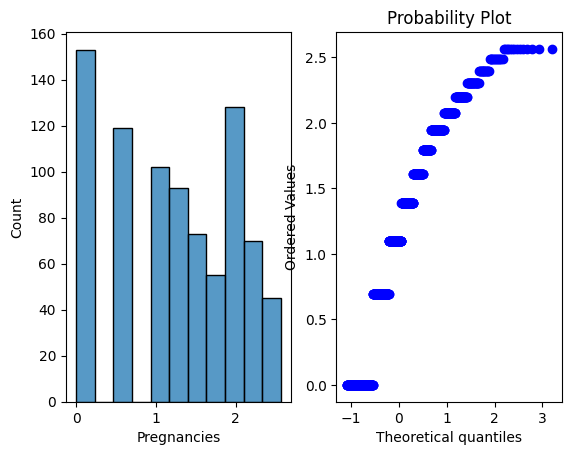

In [83]:
plt.subplot(1,2,1)
sns.histplot(p1)

plt.subplot(1,2,2)
stat.probplot(p1 , dist = 'norm', plot=plt)
plt.show()

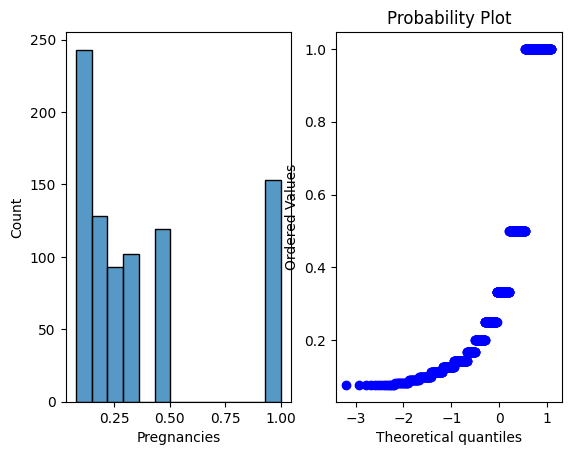

In [84]:
plt.subplot(1,2,1)
sns.histplot(1/df['Pregnancies'])

plt.subplot(1,2,2)
stat.probplot(1/df['Pregnancies'] , dist = 'norm', plot=plt)
plt.show()

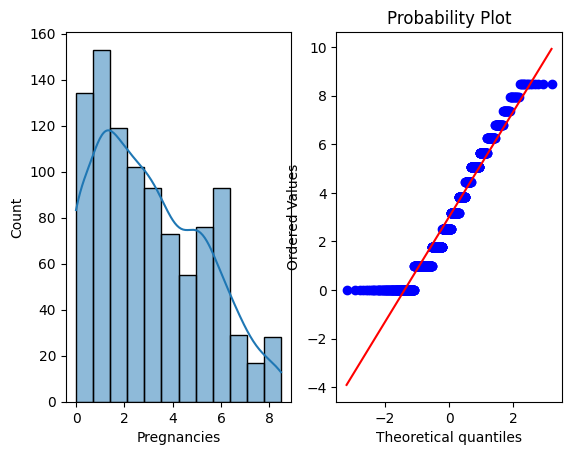

In [85]:
plt.subplot(1,2,1)
sns.histplot(df['Pregnancies']**(1/1.2),kde=True)

plt.subplot(1,2,2)
stat.probplot(df['Pregnancies']**(1/1.2) , dist = 'norm', plot=plt)
plt.show()

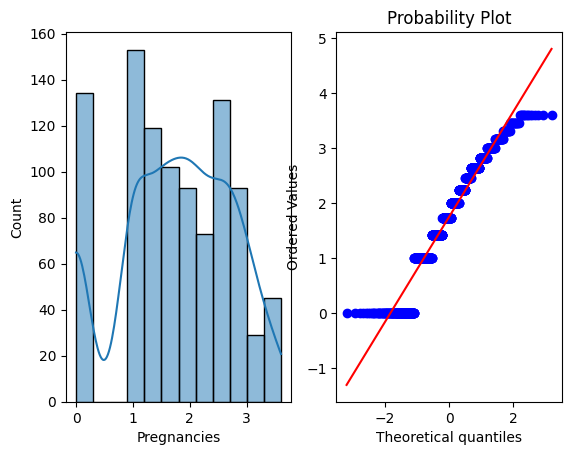

In [86]:
plt.subplot(1,2,1)
sns.histplot(np.sqrt(df['Pregnancies']),kde=True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(df['Pregnancies']) , dist = 'norm', plot=plt)
plt.show()

In [87]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome,Age_boxcox,dpf_boxcox
1,1,85,66,29,0,26.6,0,1.169127,-0.996397
3,1,89,66,23,94,28.1,0,1.139891,-1.645347
5,5,116,74,0,0,25.6,0,1.167002,-1.487725


In [88]:
df['BloodPressure'].value_counts()

BloodPressure
74     64
70     62
76     58
72     58
78     58
68     50
80     50
0      49
64     48
88     46
62     45
60     44
84     41
66     40
82     36
90     35
86     24
58     23
52     16
50     16
56     12
54     12
94     11
92      9
75      7
85      7
98      6
65      6
44      4
100     4
30      4
110     4
48      3
96      3
106     3
46      2
108     2
55      2
38      1
114     1
104     1
122     1
24      1
61      1
95      1
102     1
Name: count, dtype: int64

In [89]:
df = df[~df['BloodPressure'].isin([0])]

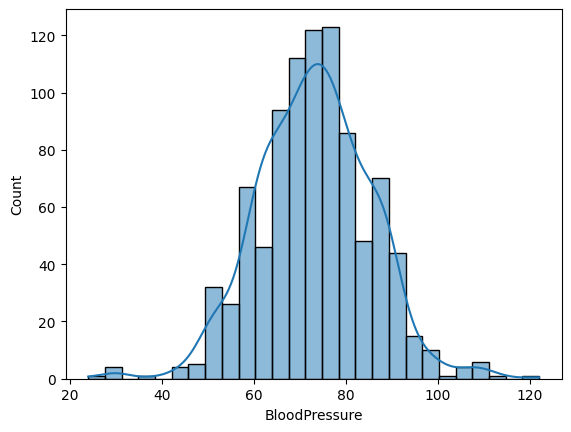

In [90]:
sns.histplot(df['BloodPressure'],kde = True)
plt.show()

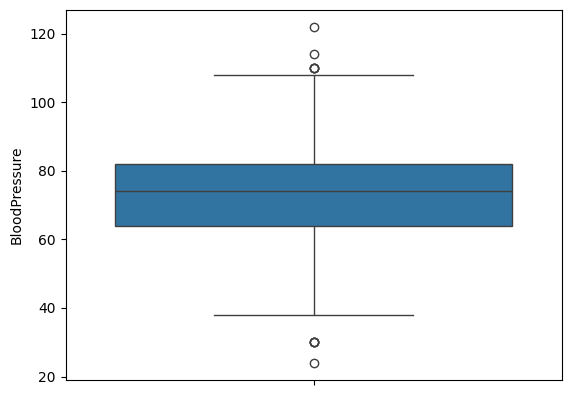

In [91]:
sns.boxplot(df['BloodPressure'])
plt.show()

In [92]:
df['BloodPressure'][df['BloodPressure'] > df['BloodPressure'].quantile(0.991)]

106    122
362    108
549    110
43     110
43     110
691    114
177    110
84     108
Name: BloodPressure, dtype: int64

In [93]:
df['BloodPressure'][df['BloodPressure'] < df['BloodPressure'].quantile(0.01)]

18     30
80     44
575    44
576    44
597    24
599    38
741    44
125    30
125    30
125    30
Name: BloodPressure, dtype: int64

In [94]:
df = df[~df['BloodPressure'].isin([110,108,122,38,24,30,106])]

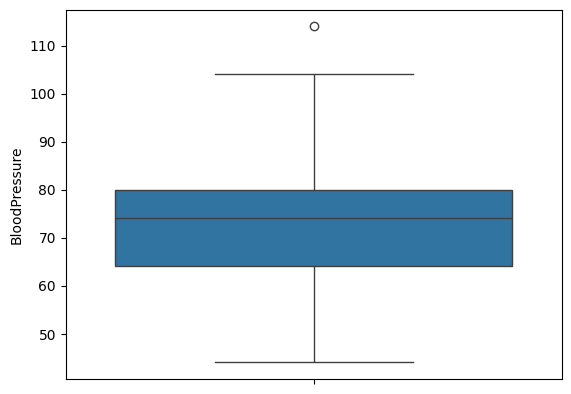

In [95]:
sns.boxplot(df['BloodPressure'])
plt.show()

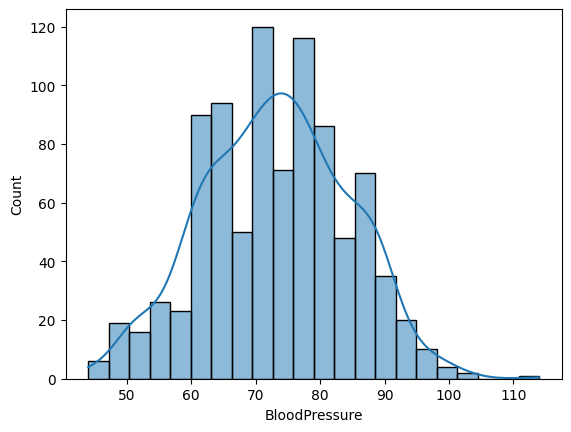

In [96]:
sns.histplot(df['BloodPressure'],kde = True)
plt.show()

In [97]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome,Age_boxcox,dpf_boxcox
1,1,85,66,29,0,26.6,0,1.169127,-0.996397
3,1,89,66,23,94,28.1,0,1.139891,-1.645347
5,5,116,74,0,0,25.6,0,1.167002,-1.487725


In [98]:
df['Insulin'].unique()

array([  0,  94, 235, 140, 110,  54, 192,  70,  82,  36,  23, 342, 142,
       128,  38, 100, 270,  71, 125, 176,  48,  64, 228,  76,  40, 152,
        18,  37,  51, 135,  49,  50,  92, 325,  63, 284, 119, 204, 485,
        53, 105, 285,  78,  55,  44, 190,  87, 120,  56,  32, 744,  45,
        88, 194, 680, 402, 375, 130,  67,  57, 116, 278, 122, 155, 545,
        75, 215,  42, 148,  85, 231, 168,  68,  52,  58, 255,  73, 108,
        83,  74,  43, 293,  66, 158,  84,  72, 182,  59,  81, 196, 415,
       275, 115, 165, 310,  61, 170, 145,  60,  95, 210, 480, 265, 193,
        79,  86, 326, 188, 106,  65, 166,  77, 126, 330, 230,  41, 272,
        15, 160,  90, 183,  46, 440, 200, 132, 240, 205, 180, 335, 387,
        22, 291, 178,  16, 112, 304, 318,  96, 167, 510, 146, 478, 271,
       225, 300, 579, 846, 249, 495, 150, 245,  14, 191, 543, 600, 321,
       280, 220,  99, 144, 258, 237, 159, 156, 129, 185, 274, 465, 207,
       175, 474,  91, 328, 392, 540, 250], dtype=int64)

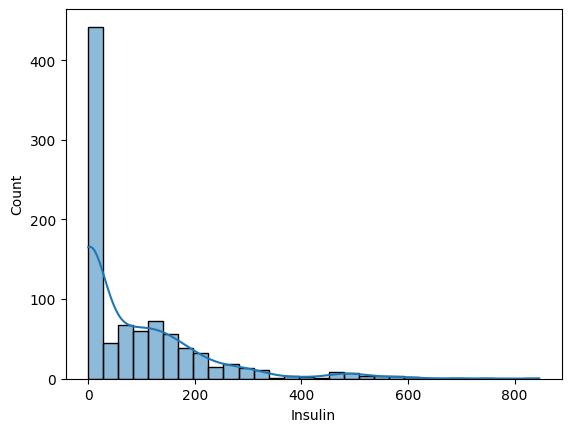

In [99]:
sns.histplot(df['Insulin'],kde = True)
plt.show()

In [100]:
const = 0.00005
tr = np.log(df['Insulin']+const)

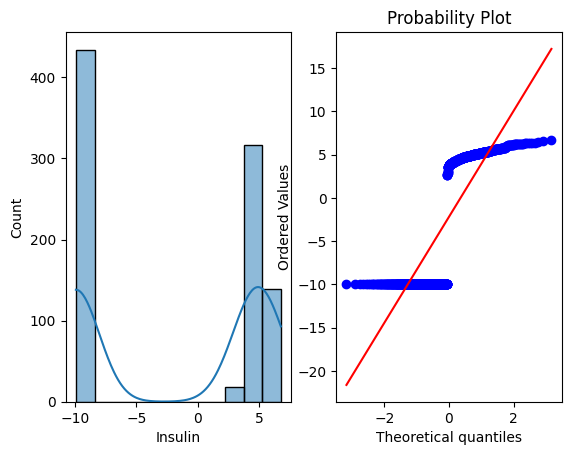

In [101]:
plt.subplot(1,2,1)
sns.histplot(tr , kde=True)

plt.subplot(1,2,2)
stat.probplot(tr ,dist = 'norm' ,  plot = plt)
plt.show()

In [102]:
trd = np.log1p(df['Insulin'])

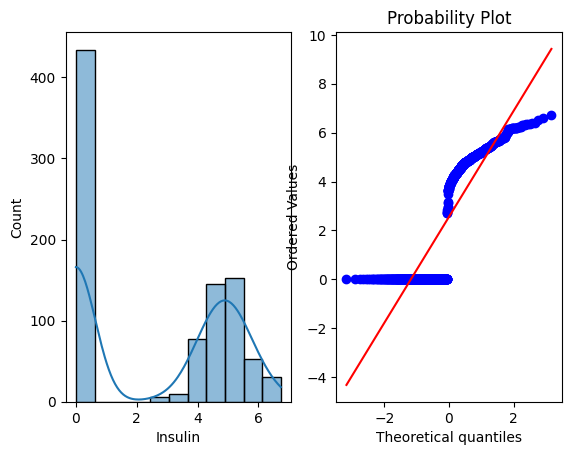

In [103]:
plt.subplot(1,2,1)
sns.histplot(trd , kde=True)

plt.subplot(1,2,2)
stat.probplot(trd ,dist = 'norm' ,  plot = plt)
plt.show()

In [104]:
i2 = np.log(df['Insulin'])
i2

1          -inf
3      4.543295
5          -inf
10         -inf
12         -inf
         ...   
11         -inf
399        -inf
388    5.652489
408        -inf
264        -inf
Name: Insulin, Length: 907, dtype: float64

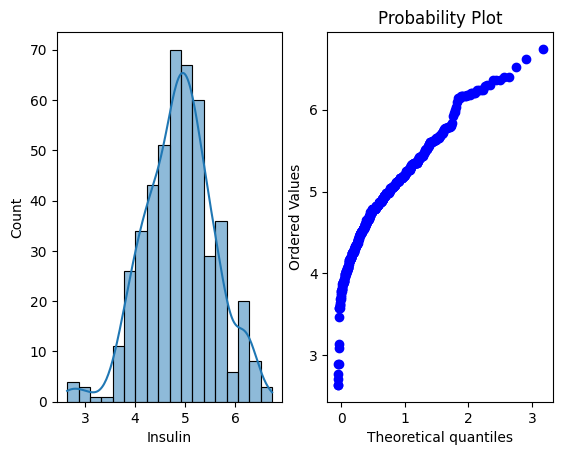

In [105]:
plt.subplot(1,2,1)
sns.histplot(i2 , kde=True)

plt.subplot(1,2,2)
stat.probplot(i2 ,dist = 'norm' ,  plot = plt)
plt.show()

In [106]:
df['insulin'] = np.log(df['Insulin'])

In [107]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome,Age_boxcox,dpf_boxcox,insulin
1,1,85,66,29,0,26.6,0,1.169127,-0.996397,-inf
3,1,89,66,23,94,28.1,0,1.139891,-1.645347,4.543295
5,5,116,74,0,0,25.6,0,1.167002,-1.487725,-inf
10,4,110,92,0,0,37.6,0,1.167002,-1.531410,-inf
12,10,139,80,0,0,27.1,0,1.199963,-0.703200,-inf


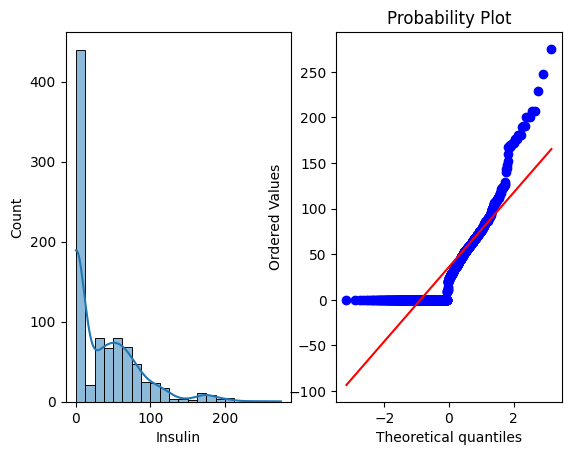

In [108]:
plt.subplot(1,2,1)
sns.histplot(df['Insulin']**(1/1.2) , kde=True)

plt.subplot(1,2,2)
stat.probplot(df['Insulin']**(1/1.2)  ,dist = 'norm' ,  plot = plt)
plt.show()

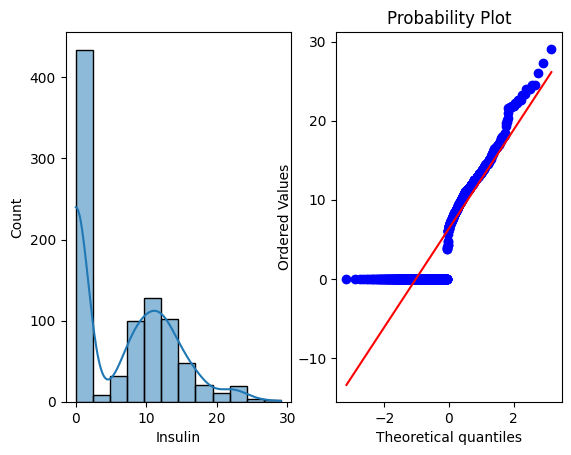

In [109]:
plt.subplot(1,2,1)
sns.histplot(df['Insulin']**(1/2) , kde=True)

plt.subplot(1,2,2)
stat.probplot(df['Insulin']**(1/2)  ,dist = 'norm' ,  plot = plt)
plt.show()

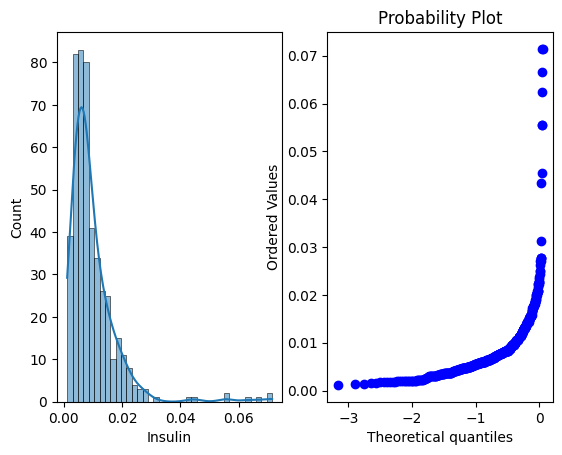

In [110]:
plt.subplot(1,2,1)
sns.histplot(1/df['Insulin'] , kde=True)

plt.subplot(1,2,2)
stat.probplot(1/df['Insulin']  ,dist = 'norm' ,  plot = plt)
plt.show()

In [111]:
transformed_data = np.sqrt(df['Insulin'] + 1)

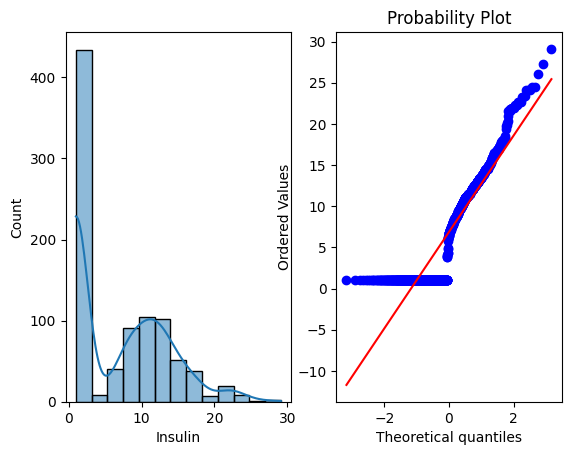

In [112]:
plt.subplot(1,2,1)
sns.histplot(transformed_data , kde=True)

plt.subplot(1,2,2)
stat.probplot(transformed_data ,dist = 'norm' ,  plot = plt)
plt.show()

In [113]:
from scipy.stats import yeojohnson
transform_data, lambda_value = yeojohnson(df['Insulin'])



In [114]:
transformed_data

1       1.000000
3       9.746794
5       1.000000
10      1.000000
12      1.000000
         ...    
11      1.000000
399     1.000000
388    16.911535
408     1.000000
264     1.000000
Name: Insulin, Length: 907, dtype: float64

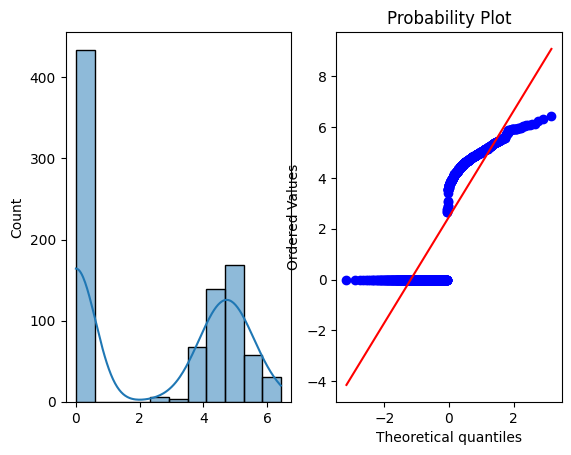

In [115]:
plt.subplot(1,2,1)
sns.histplot(transform_data , kde=True)

plt.subplot(1,2,2)
stat.probplot(transform_data ,dist = 'norm' ,  plot = plt)
plt.show()

In [116]:
tr2 = np.exp(df['Insulin'])
tr2

1       1.000000e+00
3       6.663176e+40
5       1.000000e+00
10      1.000000e+00
12      1.000000e+00
           ...      
11      1.000000e+00
399     1.000000e+00
388    5.941927e+123
408     1.000000e+00
264     1.000000e+00
Name: Insulin, Length: 907, dtype: float64

In [117]:
rank = df['Insulin'].rank()
rank

1      217.5
3      577.0
5      217.5
10     217.5
12     217.5
       ...  
11     217.5
399    217.5
388    849.5
408    217.5
264    217.5
Name: Insulin, Length: 907, dtype: float64

In [118]:
tr3 = rank/len(rank)
tr3

1      0.239802
3      0.636163
5      0.239802
10     0.239802
12     0.239802
         ...   
11     0.239802
399    0.239802
388    0.936604
408    0.239802
264    0.239802
Name: Insulin, Length: 907, dtype: float64

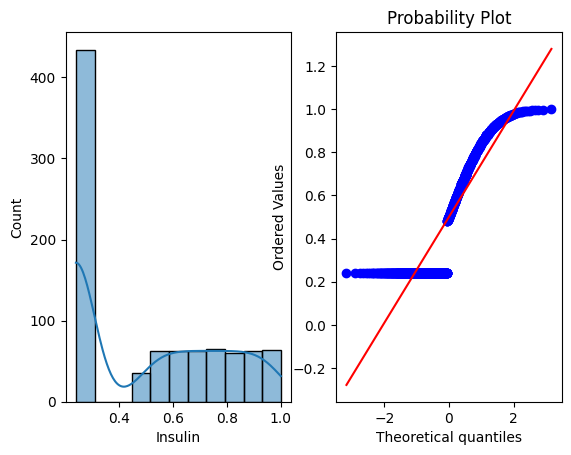

In [119]:
plt.subplot(1,2,1)
sns.histplot(tr3 , kde=True)

plt.subplot(1,2,2)
stat.probplot(tr3 ,dist = 'norm' ,  plot = plt)
plt.show()

In [120]:
from scipy.stats import boxcox


tr4, lambda_value = boxcox(df['Insulin'] + 1)


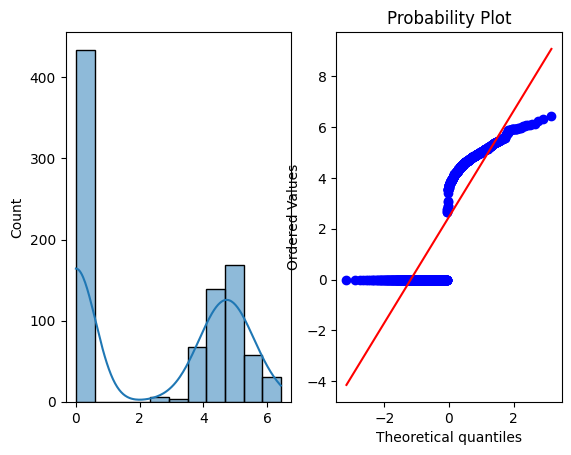

In [121]:
plt.subplot(1,2,1)
sns.histplot(tr4 , kde=True)

plt.subplot(1,2,2)
stat.probplot(tr4 ,dist = 'norm' ,  plot = plt)
plt.show()

In [122]:
df.drop('insulin',axis=1, inplace=True)

In [123]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome,Age_boxcox,dpf_boxcox
1,1,85,66,29,0,26.6,0,1.169127,-0.996397
3,1,89,66,23,94,28.1,0,1.139891,-1.645347
5,5,116,74,0,0,25.6,0,1.167002,-1.487725
10,4,110,92,0,0,37.6,0,1.167002,-1.531410
12,10,139,80,0,0,27.1,0,1.199963,-0.703200


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x = df.drop('Outcome',axis=1)

In [126]:
y= df['Outcome']

In [127]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.23,random_state=58)

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

In [130]:
x_trsc = scaler.fit_transform(x_tr)
x_tesc = scaler.transform(x_te)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression()

In [133]:
lr.fit(x_trsc,y_tr)

LogisticRegression()

In [134]:
lr.score(x_trsc,y_tr)

0.7464183381088825

In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [136]:
y_pred = lr.predict(x_tesc)

In [137]:
accuracy_score(y_pred,y_te)

0.7703349282296651

In [138]:
for i in range(20):
    x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.23)
    lr = LogisticRegression()
    lr.fit(x_trsc,y_tr)
    y_pred= lr.predict(x_tesc)
    print(accuracy_score(y_te,y_pred))

0.5406698564593302
0.5023923444976076
0.48325358851674644
0.4449760765550239
0.4784688995215311
0.48325358851674644
0.5023923444976076
0.5167464114832536
0.44976076555023925
0.5215311004784688
0.5358851674641149
0.4880382775119617
0.5263157894736842
0.5023923444976076
0.5263157894736842
0.49282296650717705
0.49282296650717705
0.46411483253588515
0.4880382775119617
0.5119617224880383


In [139]:
score1 = []
for i in range(1000):
    x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.23,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_trsc,y_tr)
    y_pred= lr.predict(x_tesc)
    score1.append(accuracy_score(y_te,y_pred))

In [140]:
score1[np.argmax(score1)]

0.7703349282296651

In [141]:
parameters = {'C':[0.01,0.1,1,10,20,50,100], 'penalty':['l1','l2']}

In [142]:
lrgcv = GridSearchCV(lr,parameters,cv=5)

In [143]:
lrgcv.fit(x_trsc,y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']})

In [144]:
lrgcv.best_params_

{'C': 10, 'penalty': 'l2'}

In [145]:
y_pred5 = lrgcv.predict(x_tesc)

In [146]:
accuracy_score(y_pred5,y_te)

0.44019138755980863

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rfc = RandomForestClassifier()

In [149]:
rfc.fit(x_trsc,y_tr)

RandomForestClassifier()

In [150]:
rfc.score(x_trsc,y_tr)

0.8954154727793696

In [151]:
y_pred2 =  rfc.predict(x_tesc)

In [152]:
accuracy_score(y_pred2,y_te)

0.49760765550239233

In [153]:
params = {'n_estimators':[50,100,200],'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}

In [154]:
grcv = GridSearchCV(rfc , params)

In [155]:
grcv.fit(x_trsc,y_tr)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]})

In [156]:
best_params = grcv.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [157]:
best_rfc = RandomForestClassifier(**best_params)

In [158]:
best_rfc.fit(x_trsc,y_tr)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

In [159]:
best_rfc.score(x_trsc,y_tr)

0.8896848137535817

In [160]:
y_pred4 = best_rfc.predict(x_tesc)

In [161]:
accuracy_score(y_pred4,y_te)

0.5023923444976076

In [162]:
from sklearn.svm import SVC

In [163]:
svm = SVC(kernel='linear')

In [164]:
svm.fit(x_trsc,y_tr)

SVC(kernel='linear')

In [165]:
svm.score(x_trsc,y_tr)

0.5372492836676218

In [166]:
y_pred3 = svm.predict(x_tesc)

In [167]:
accuracy_score(y_pred3,y_te)

0.45454545454545453

STACKING

In [168]:
from sklearn.ensemble import StackingClassifier

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
estimators = [
('rf', RandomForestClassifier(n_estimators=10,random_state=55)),
('knn', KNeighborsClassifier(n_neighbors=10)),
('gbc', GradientBoostingClassifier())
]

In [171]:
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),
                        cv=10)

In [172]:
clf.fit(x_trsc,y_tr)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=55)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbc', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [173]:
clf.score(x_trsc,y_tr)

0.6289398280802292

In [174]:
y_pred6 = clf.predict(x_tesc)

In [175]:
accuracy_score(y_pred6,y_te)

0.5311004784688995

In [176]:
# for i in range(20):
#     x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.23)
#     clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),
#                         cv=10)
#     clf.fit(x_trsc,y_tr)
#     y_pred7= clf.predict(x_tesc)
#     print(accuracy_score(y_te,y_pred7))

In [177]:
# score2 = []
# for i in range(100):
#     x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.23,random_state=i)
#     clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),
#                         cv=10)
#     clf.fit(x_trsc,y_tr)
#     y_pred7= clf.predict(x_tesc)
#     score2.append(accuracy_score(y_te,y_pred7))

In [178]:
# np.argmax(score2)

In [179]:
# score2[np.argmax(score2)]

In [182]:
import pickle

In [183]:
filename = 'train_model.sav'
pickle.dump(lr , open(filename,'wb'))

In [184]:
# LOADING THE SAVED MODEL
loaded_model = pickle.load(open('train_model.sav','rb'))

In [192]:
input = (0,108,68,20,0,27.3,1.171133,-0.236812)
#input_data to numpy array
input_data_as_numpy_array = np.array(input)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 1):
    print('Person is diabetic')
else:
    print('person is not diabetic')

[1]
Person is diabetic


In [193]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome,Age_boxcox,dpf_boxcox
708,9,164,78,0,0,32.8,1,1.189740,-1.746591
728,2,175,88,0,0,22.9,0,1.143881,-1.063029
330,8,118,72,19,0,23.1,0,1.190774,-0.703200
363,4,146,78,0,0,38.5,1,1.175078,-0.633953
691,13,158,114,0,0,42.3,1,1.188664,-1.274334
